自从看了卡尔曼滤波的教程，看到里面用到了 sympy 来显示公式和进行公式推导，忍不住心里痒痒，就想学学该怎么用。

In [16]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

这里默认使用 ipython notebook，上面的语句会使用比较漂亮的方式来显示公式。

## 本文主要记录:
1.变量的定义

2.演算
    * 极限
    * 微分
    * 技术展开
    * 求和
    * 积分
    * 复数
    * 函数
    * 微分方程
    * 代数方程
    * 矩阵
    

## 变量的定义

变量的定义使用 symbols 函数，可以限制变量的类型，比如为整数或者为函数等。

In [12]:
x, y, z, t = symbols('x y z t')

In [52]:
i,k, m, n = symbols('i k m n', integer=True)

In [87]:
f, g, h = symbols('f g h', cls=Function)

In [88]:
symbols('x:10')

## 极限

In [26]:
limit(sin(x)/x,x,0)

**大小写的区别是大写不运算，小写给出运算结果**

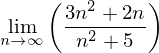

In [47]:
Limit((3 * n ** 2 + 2 * n )/ (n ** 2 + 5),n,oo)

In [30]:
limit((3 * n ** 2 + 2 * n )/ (n ** 2 + 5),n,oo)

## 微分

In [34]:
diff(sin(x),x)

In [43]:
diff(sin(2*x), x, 2)

## 积分

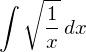

In [35]:
Integral(sqrt(1/x),x)

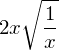

In [40]:
integrate(sqrt(1/x),x)

In [42]:
integrate(sqrt(1/x),(x,1,2))

## 多项式

In [32]:
expand((x + 1)**2)

In [33]:
factor(x**3 - x**2 + x - 1)

## 级数展开

使用.series(var, point, order):

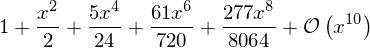

In [17]:
(1/cos(x)).series(x, 0, 10)

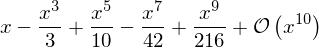

In [19]:
integrate(exp(-x ** 2),x).series(x,0,10)

### 画出级数图形

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = Symbol('x')
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = lambdify(xs, fx, modules=['numpy'])
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)

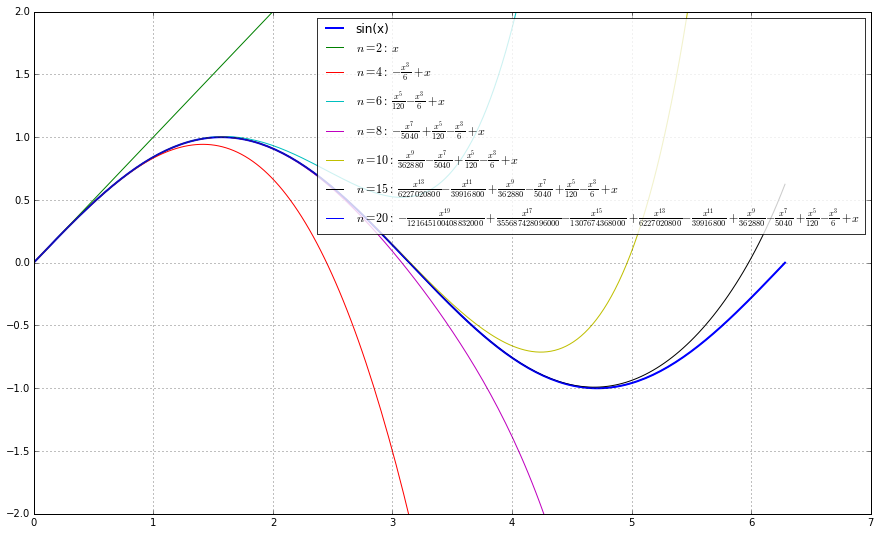

In [97]:
# You can change the default figure size to be a bit larger if you want,
# uncomment the next line for that:
#plt.rc('figure', figsize=(10, 6))
plt.rc('figure', figsize=(15, 9))
plot_taylor_approximations(sin, 0, [2, 4, 6, 8, 10, 15, 20], (0, 2*pi), (-2,2))

## 求和

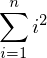

In [59]:
Sum(i ** 2,(i,1,n))

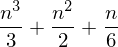

In [60]:
Sum(i ** 2,(i,1,n)).doit()

## 复数

In [61]:
exp(I*x).expand()

In [62]:
exp(I*x).expand(complex = True)

## 微分方程

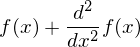

In [63]:
f(x).diff(x, x) + f(x)

In [64]:
dsolve(f(x).diff(x, x) + f(x), f(x))

## 矩阵

In [68]:
A = Matrix([[x ** 2,2*x*y], [2*x*y,y ** 2]])

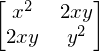

In [69]:
A

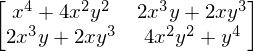

In [70]:
A ** 2

In [82]:
variables = Matrix([x,y])

In [98]:
(A ** 2).row(0)

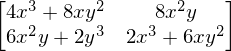

In [99]:
(A ** 2).row(0).jacobian(variables)

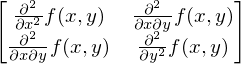

In [104]:
hessian(f(x,y),(x,y))

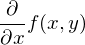

In [107]:
diff(f(x,y),x)